In [17]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.utils import all_estimators
import warnings
warnings.filterwarnings('ignore')

In [18]:
df = pd.read_csv("/Users/iseojun/Desktop/2학년 1학기/인공지능프로그래밍/candy.csv")
df.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [24]:
df.keys()

Index(['competitorname', 'chocolate', 'fruity', 'caramel', 'peanutyalmondy',
       'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus', 'sugarpercent',
       'pricepercent', 'winpercent'],
      dtype='object')

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in df.columns :
    df[i] = le.fit_transform(df[i])

In [20]:
df

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,0,1,0,1,0,0,1,0,1,0,25,24,71
1,1,1,0,0,0,1,0,0,1,0,23,18,73
2,44,0,0,0,0,0,0,0,0,0,0,8,7
3,45,0,0,0,0,0,0,0,0,0,0,18,37
4,2,0,1,0,0,0,0,0,0,0,30,18,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,80,0,1,0,0,0,0,0,0,0,11,8,34
81,81,0,1,0,0,0,0,1,0,0,4,8,20
82,82,0,1,0,0,0,0,0,0,1,14,13,33
83,83,0,0,1,0,0,0,1,0,0,9,11,27


In [21]:
df.isnull().sum()

competitorname      0
chocolate           0
fruity              0
caramel             0
peanutyalmondy      0
nougat              0
crispedricewafer    0
hard                0
bar                 0
pluribus            0
sugarpercent        0
pricepercent        0
winpercent          0
dtype: int64

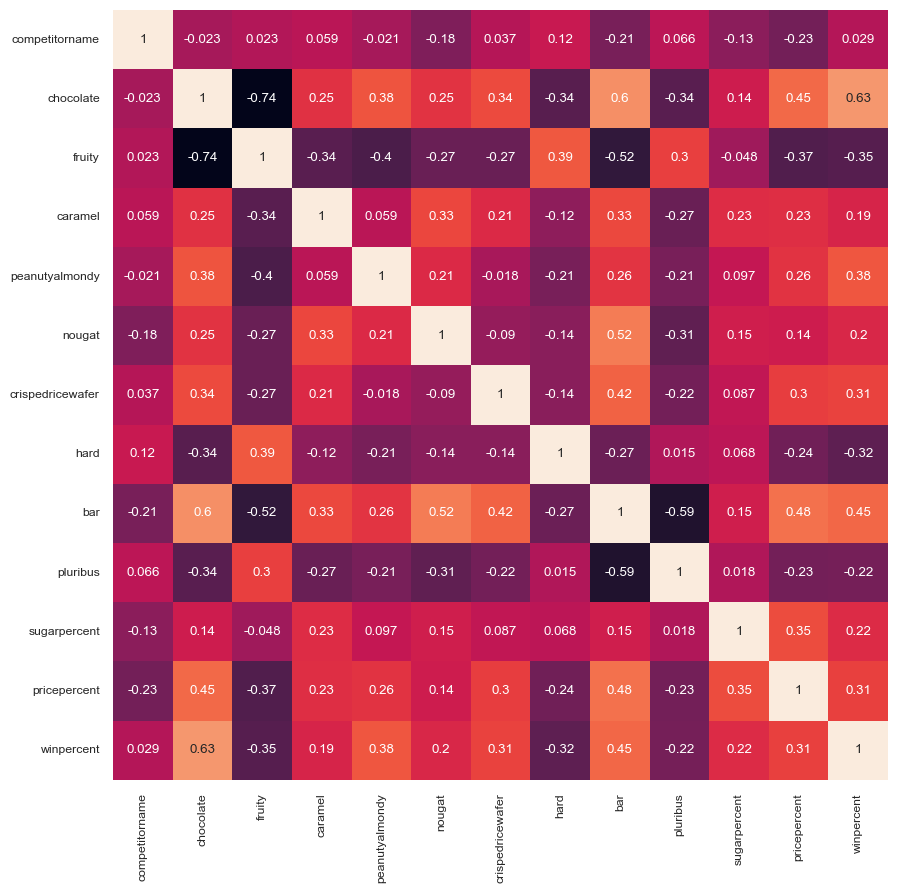

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
#상관 관계 행렬
df_corr=df.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

In [25]:
X = df.drop('pricepercent', axis=1)
y = df['pricepercent']
Y = pd.get_dummies(y).values

In [26]:
X

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,winpercent
0,0,1,0,1,0,0,1,0,1,0,25,71
1,1,1,0,0,0,1,0,0,1,0,23,73
2,44,0,0,0,0,0,0,0,0,0,0,7
3,45,0,0,0,0,0,0,0,0,0,0,37
4,2,0,1,0,0,0,0,0,0,0,30,48
...,...,...,...,...,...,...,...,...,...,...,...,...
80,80,0,1,0,0,0,0,0,0,0,11,34
81,81,0,1,0,0,0,0,1,0,0,4,20
82,82,0,1,0,0,0,0,0,0,1,14,33
83,83,0,0,1,0,0,0,1,0,0,9,27


In [27]:
y

0     24
1     18
2      8
3     18
4     18
      ..
80     8
81     8
82    13
83    11
84    23
Name: pricepercent, Length: 85, dtype: int64

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(64, activation = 'relu', input_shape = (12,)))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1)) 
model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                832       
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,945
Trainable params: 2,945
Non-trainable params: 0
_________________________________________________________________


In [32]:
N_EPOCHS = 100
history = model.fit(X_train, y_train, epochs = N_EPOCHS, validation_data=(X_test, y_test))

Epoch 1/100
3/3 [==============================] - 0s 62ms/step - loss: 13.8380 - mse: 13.8380 - val_loss: 0.8184 - val_mse: 0.8184
Epoch 2/100
3/3 [==============================] - 0s 5ms/step - loss: 2.3180 - mse: 2.3180 - val_loss: 0.2479 - val_mse: 0.2479
Epoch 3/100
3/3 [==============================] - 0s 4ms/step - loss: 1.1051 - mse: 1.1051 - val_loss: 0.7415 - val_mse: 0.7415
Epoch 4/100
3/3 [==============================] - 0s 4ms/step - loss: 1.0351 - mse: 1.0351 - val_loss: 0.2580 - val_mse: 0.2580
Epoch 5/100
3/3 [==============================] - 0s 4ms/step - loss: 0.4933 - mse: 0.4933 - val_loss: 0.7899 - val_mse: 0.7899
Epoch 6/100
3/3 [==============================] - 0s 5ms/step - loss: 1.4372 - mse: 1.4372 - val_loss: 0.2753 - val_mse: 0.2753
Epoch 7/100
3/3 [==============================] - 0s 5ms/step - loss: 0.4738 - mse: 0.4738 - val_loss: 0.3526 - val_mse: 0.3526
Epoch 8/100
3/3 [==============================] - 0s 5ms/step - loss: 0.3440 - mse: 0.3440 - 

3/3 [==============================] - 0s 4ms/step - loss: 0.1451 - mse: 0.1451 - val_loss: 0.1683 - val_mse: 0.1683
Epoch 65/100
3/3 [==============================] - 0s 5ms/step - loss: 0.1515 - mse: 0.1515 - val_loss: 0.3390 - val_mse: 0.3390
Epoch 66/100
3/3 [==============================] - 0s 4ms/step - loss: 0.4062 - mse: 0.4062 - val_loss: 0.3643 - val_mse: 0.3643
Epoch 67/100
3/3 [==============================] - 0s 5ms/step - loss: 0.4453 - mse: 0.4453 - val_loss: 0.2094 - val_mse: 0.2094
Epoch 68/100
3/3 [==============================] - 0s 5ms/step - loss: 0.1877 - mse: 0.1877 - val_loss: 0.4333 - val_mse: 0.4333
Epoch 69/100
3/3 [==============================] - 0s 5ms/step - loss: 0.7471 - mse: 0.7471 - val_loss: 0.6895 - val_mse: 0.6895
Epoch 70/100
3/3 [==============================] - 0s 6ms/step - loss: 0.4491 - mse: 0.4491 - val_loss: 0.1437 - val_mse: 0.1437
Epoch 71/100
3/3 [==============================] - 0s 5ms/step - loss: 0.1112 - mse: 0.1112 - val_loss

In [33]:
test_mse_score, test_mae_score = model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 16ms/step - loss: 0.1497 - mse: 0.1497


In [34]:
test_mse_score

0.14971303939819336

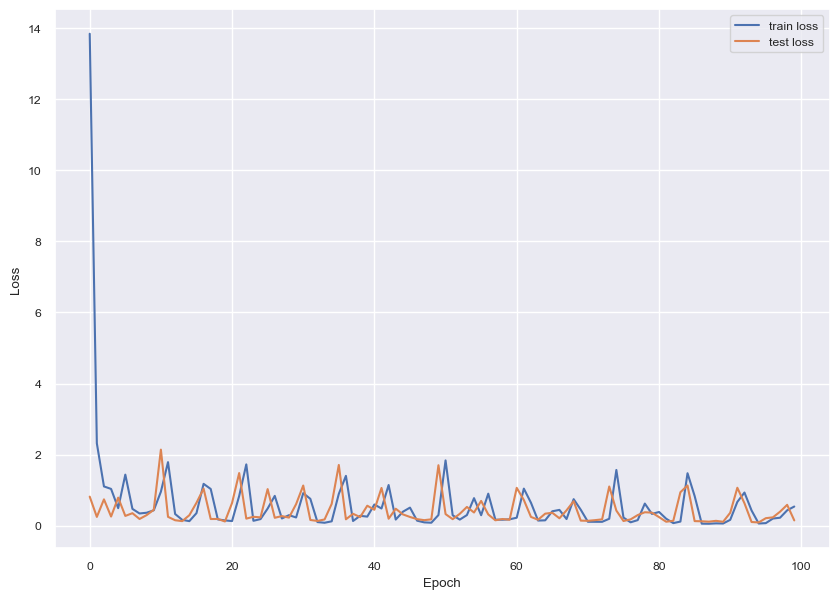

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

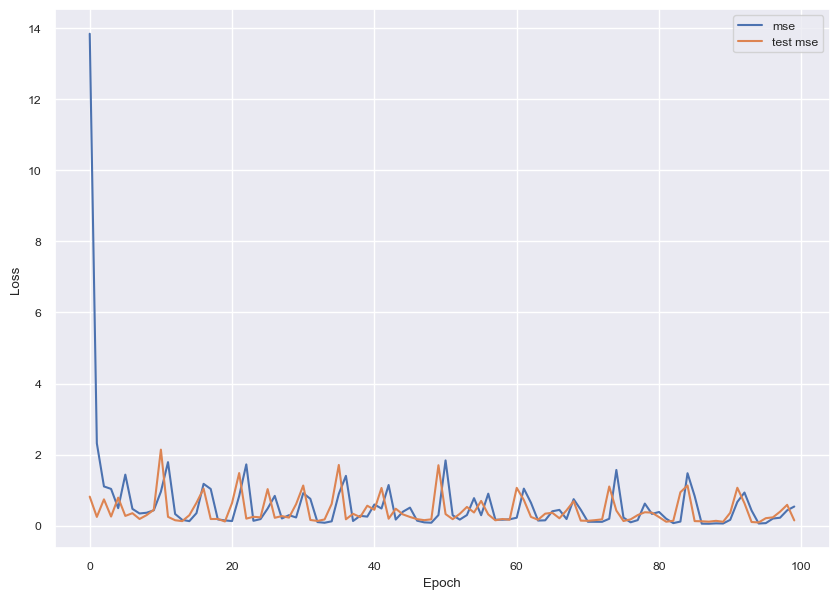

In [36]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['mse'], label='mse')
plt.plot(range(N_EPOCHS), history.history['val_mse'], label='test mse')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()